In [1]:
from etabstopython import EtabsModel


### UNITS

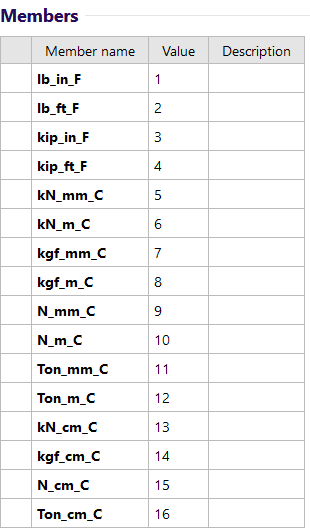

In [2]:
units = 12
# Model
model = EtabsModel(units=units , name='PRY POST PUCE')
# Summary
model.summary()

✅ Connected to ETABS.
📏 Units set to 12.
✅ Loaded Story Definitions: 3 stories.
📐 Computed accumulated floor heights: [0. 0. 3. 6.]
✅ Loaded Point Object Connectivity: 36 connections.
✅ Loaded Frame Section Property Definitions: 2 properties.
✅ Loaded Frame Section Property Definitions - Concrete Rectangular: 2 properties.
✅ Loaded Frame Assignments - Section Properties: 58 properties.
✅ Loaded Beam Object Connectivity: 34 entries.
✅ Loaded Column Object Connectivity: 24 entries.
✅ Loaded Brace Object Connectivity: 1 entries.
⚠️ brace_object_connectivity cargada pero le faltan columnas requeridas.
✅ Combined linear elements: 58 total.
✅ Loaded Wall Object Connectivity: 1 entries.
✅ Loaded Floor Object Connectivity: 12 entries.
✅ Processed floor point groups by story: 1 levels.
📐 Assigned dimensions to 2 frame sections.
✅ Assigned colors to 2 frame sections.
✅ Loaded Element Forces - Columns: 6408 entries.
✅ Loaded Modal Participating Mass Ratios: 6 entries.
✅ Loaded Story Forces: 356 e

⚠️ Error plotting wall: 'UniquePt1'


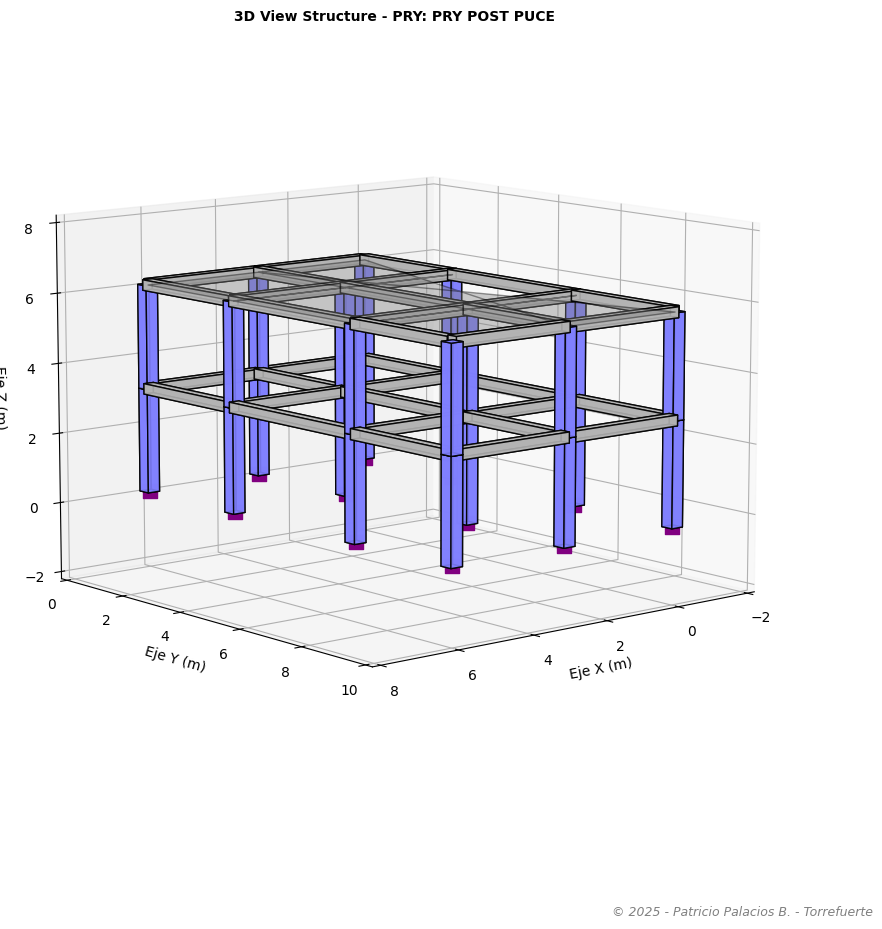

In [3]:
from etabstopython.plotter import plot_structure_3d
plot_structure_3d(model)
# %matplotlib widget

### Drift

In [14]:
Cd = 5.5
Ie = 1.25
R = 1.0

print(Cd*Ie/R)

6.875


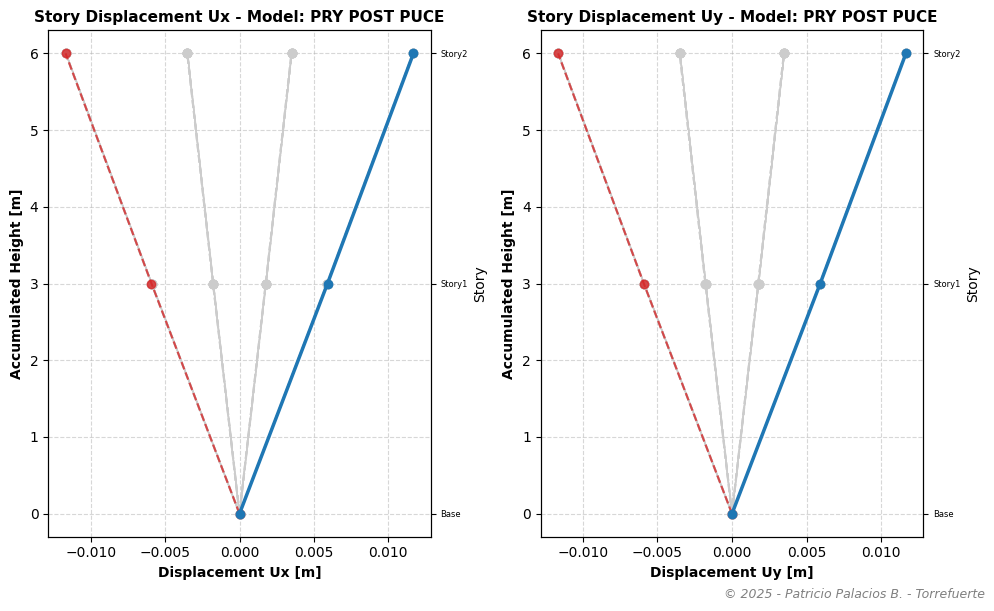

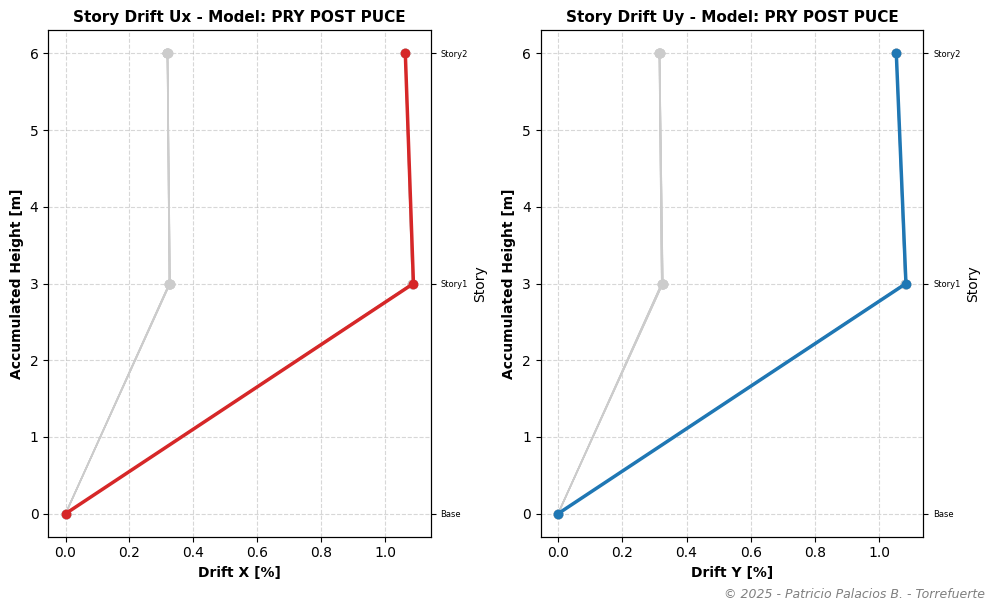

In [ ]:
from etabstopython.plotter import plot_story_displacement_bounds
from etabstopython.plotter import plot_story_drift_bounds



combos_comp=['1.2D+1.0E+1.0L+0.2S (1X)' , '1.2D+1.0E+1.0L+0.2S (2X)'    , '1.2D+1.0E+1.0L+0.2S (3X)'     , '1.2D+1.0E+1.0L+0.2S (4X)', 
             '0.9D+1.0E (1X)'           , '0.9D+1.0E (2X)'              , '0.9D+1.0E (3X)'               , '0.9D+1.0E (4X)', 
             '1.2D+1.0E+1.0L+0.2S (1Y)' , '1.2D+1.0E+1.0L+0.2S (2Y)'    , '1.2D+1.0E+1.0L+0.2S (3Y)'     , '1.2D+1.0E+1.0L+0.2S (4Y)', 
             '0.9D+1.0E (1Y)'           , '0.9D+1.0E (2Y)'              , '0.9D+1.0E (3Y)'               , '0.9D+1.0E (4Y)' , ]


# combos_comp=['1.2D+1.6L', '0.9D+1.0E (3Y)']
# combos_comp=['1.2D+1.6L']

highlight_combo='Envolvente-AEE'


plot_story_displacement_bounds(model, combos_comp, color=[0.8, 0.8, 0.8], lw=1.0, highlight_combo=highlight_combo , factor=1.0)
plot_story_drift_bounds(model, combos_comp, color=[0.8, 0.8, 0.8], lw=1.0, highlight_combo=highlight_combo, factor=Cd*Ie/R)
